In [2]:

import pandas as pd
from glob import glob
import missingno as msno



In [3]:
# Use glob to sort the list in assending
stock_files = sorted(glob('*.csv'))

# Concat all the separate CSV files into one dataframe
listing = pd.concat((pd.read_csv(file).assign(filename=file) for file in stock_files), ignore_index=True)

data = listing[
    ['id', 'last_scraped', 'host_name', 'host_since', 'host_location', 'host_response_time', 'host_response_rate',
     'host_acceptance_rate', 'host_is_superhost', 'city', 'zipcode', 'latitude', 'longitude', 'property_type',
     'room_type', 'accommodates', 'bedrooms', 'bathrooms', 'beds', 'bed_type', 'price', 'weekly_price', 'monthly_price',
     'security_deposit', 'cleaning_fee', 'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews',
     'number_of_reviews_ltm', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy',
     'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
     'review_scores_value', 'instant_bookable', 'reviews_per_month']]

<ipython-input-3-44a46cdd3fd9>:5: DtypeWarning: Columns (43) have mixed types.Specify dtype option on import or set low_memory=False.
  listing = pd.concat((pd.read_csv(file).assign(filename=file) for file in stock_files), ignore_index=True)
<ipython-input-3-44a46cdd3fd9>:5: DtypeWarning: Columns (61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  listing = pd.concat((pd.read_csv(file).assign(filename=file) for file in stock_files), ignore_index=True)
<ipython-input-3-44a46cdd3fd9>:5: DtypeWarning: Columns (43,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  listing = pd.concat((pd.read_csv(file).assign(filename=file) for file in stock_files), ignore_index=True)


In [4]:
data.head()


,id,last_scraped,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,city,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,1078,2019-01-15,Tracy,2013-01-08,"Austin, Texas, United States",NaN,NaN,NaN,t,Austin,...,2017-07-14,98.0,10.0,10.0,10.0,10.0,10.0,10.0,t,1.65
1,2265,2019-01-14,Paddy,2008-08-23,"Austin, Texas, United States",within an hour,100%,NaN,t,Austin,...,2018-09-16,93.0,9.0,10.0,9.0,10.0,8.0,9.0,f,0.19
2,5245,2019-01-14,Paddy,2008-08-23,"Austin, Texas, United States",within an hour,100%,NaN,t,Austin,...,2018-03-14,91.0,10.0,8.0,10.0,9.0,10.0,9.0,f,0.08
3,5456,2019-01-14,Sylvia,2009-02-16,"Austin, Texas, United States",within a few hours,100%,NaN,t,Austin,...,2018-12-16,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,3.88
4,5769,2019-01-15,Elizabeth,2009-02-19,"Austin, Texas, United States",within an hour,100%,NaN,t,Austin,...,2018-10-20,98.0,10.0,10.0,10.0,10.0,9.0,10.0,f,2.23


In [5]:
data.describe()

,id,host_acceptance_rate,latitude,longitude,accommodates,bedrooms,bathrooms,beds,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,1.506140e+05,0.0,150614.000000,150614.000000,150614.000000,150555.000000,150369.000000,150433.000000,150614.000000,1.506140e+05,150614.000000,150614.000000,116192.000000,116124.000000,116128.000000,116099.000000,116114.000000,116023.000000,116036.000000,117802.000000
mean,1.947830e+07,NaN,30.277532,-97.751780,4.660364,1.792461,1.545990,2.518124,4.689936,1.859780e+05,27.633341,11.376970,96.231883,9.780157,9.630959,9.860154,9.869077,9.759884,9.608449,1.655445
std,1.115447e+07,NaN,0.056914,0.056668,3.171392,1.270582,0.886347,2.550530,17.273917,1.995039e+07,56.079837,19.985068,6.848616,0.672803,0.814873,0.579867,0.552465,0.614700,0.774448,2.007895
min,1.078000e+03,NaN,30.098076,-98.055683,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.010000
25%,1.047526e+07,NaN,30.244232,-97.769060,2.000000,1.000000,1.000000,1.000000,1.000000,2.800000e+01,1.000000,0.000000,95.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,0.250000
50%,2.074314e+07,NaN,30.266670,-97.744900,4.000000,1.000000,1.000000,2.000000,2.000000,1.125000e+03,6.000000,2.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.940000
75%,2.875548e+07,NaN,30.298610,-97.720910,6.000000,2.000000,2.000000,3.000000,2.000000,1.125000e+03,28.000000,14.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.400000
max,4.147778e+07,NaN,30.512360,-97.560620,33.000000,23.000000,18.500000,132.000000,999.000000,2.147484e+09,912.000000,671.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,62.500000


<AxesSubplot:>

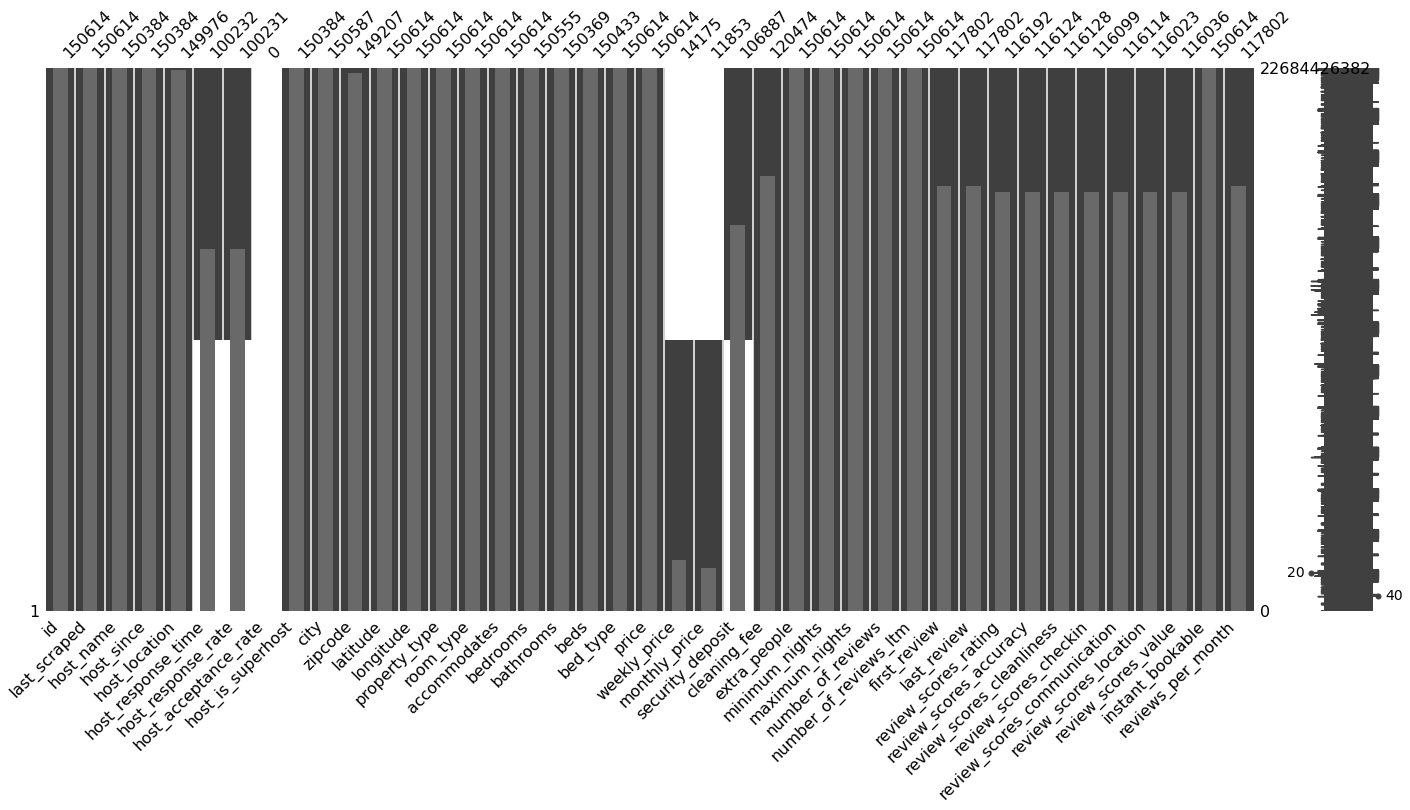

In [9]:
msno.matrix(data)
msno.bar(data)


<AxesSubplot:>

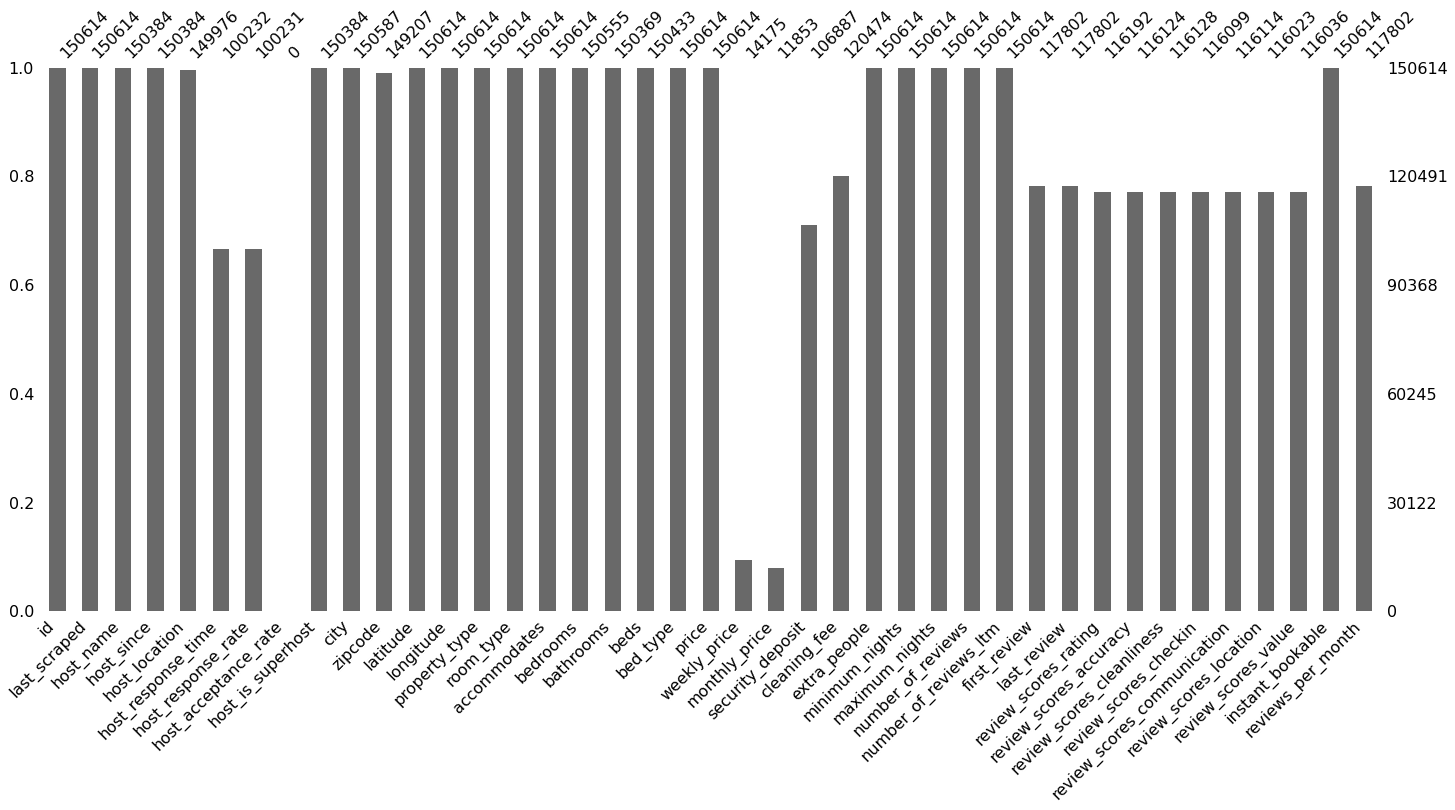

In [ ]:
data.to_csv('data.csv', index = False)


In [16]:
data.to_csv('data.csv', index = False)
